In [1]:
#Names of Group Members: Hayden Johnson

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

# Q1.) Web Crawling Tables

### Q1.A.) Create a list of links for all the wikipedia pages for NYSE traded companies A-Z and 0-9

In [3]:
def lovely_soup(u):
    page = requests.get(u)
    return(BeautifulSoup(page.content, 'html.parser'))

In [4]:
stockURL = 'https://www.nyse.com/quote/XNYS:'
URL = "https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(A)"
baseURL = '/wiki/Companies_listed_on_the_New_York_Stock_Exchange_'
soup = lovely_soup(URL)

In [5]:
soup.findAll("a", href = True)

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>,
 <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>,
 <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>,
 <a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a>,
 <a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a>,
 <a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a>,
 <a href="https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_en.wikipedia.org&amp;uselang=en" title="Support us by donating to the Wikimedia Foundation"><span>Donate</span></a>,
 <a href=

In [6]:
wikiUrlList = []

for a in soup.findAll("a", href = True):
    if baseURL in a['href']:
        wikiUrlList.append('https://en.wikipedia.org/' + a["href"] )

In [7]:
wikiUrlList

['https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(A)',
 'https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(A)',
 'https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(A)',
 'https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(0%E2%80%939)',
 'https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(B)',
 'https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(C)',
 'https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(D)',
 'https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(E)',
 'https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(F)',
 'https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(G)',
 'https://en.wikipedia.org//wiki/Companies_listed_on_the_New_York_Stock_Exchange_(H)',
 'https://en.wikipedia.org//wiki/

In [8]:
stockUrlList = []

for a in soup.findAll("a", href = True):
    if stockURL in a['href']:
        stockUrlList.append(a["href"] )

In [9]:
stockUrlList

['https://www.nyse.com/quote/XNYS:AOS',
 'https://www.nyse.com/quote/XNYS:ATEN',
 'https://www.nyse.com/quote/XNYS:AAC',
 'https://www.nyse.com/quote/XNYS:AIR',
 'https://www.nyse.com/quote/XNYS:AAN',
 'https://www.nyse.com/quote/XNYS:ABB',
 'https://www.nyse.com/quote/XNYS:ABT',
 'https://www.nyse.com/quote/XNYS:ABBV',
 'https://www.nyse.com/quote/XNYS:ANF',
 'https://www.nyse.com/quote/XNYS:GCH',
 'https://www.nyse.com/quote/XNYS:JEQ',
 'https://www.nyse.com/quote/XNYS:SGF',
 'https://www.nyse.com/quote/XNYS:ABM',
 'https://www.nyse.com/quote/XNYS:AKR',
 'https://www.nyse.com/quote/XNYS:ACN',
 'https://www.nyse.com/quote/XNYS:ACCO',
 'https://www.nyse.com/quote/XNYS:ATV',
 'https://www.nyse.com/quote/XNYS:ATU',
 'https://www.nyse.com/quote/XNYS:GOLF',
 'https://www.nyse.com/quote/XNYS:AYI',
 'https://www.nyse.com/quote/XNYS:ADX',
 'https://www.nyse.com/quote/XNYS:AGRO',
 'https://www.nyse.com/quote/XNYS:ADPT',
 'https://www.nyse.com/quote/XNYS:ADNT',
 'https://www.nyse.com/quote/XNYS

In [10]:
allStockList = []
for url in wikiUrlList:
    soup = lovely_soup(url)

    for a in soup.findAll("a", href = True):
        if stockURL in a['href']:
            allStockList.append(a["href"] )

In [11]:
allStockList

['https://www.nyse.com/quote/XNYS:AOS',
 'https://www.nyse.com/quote/XNYS:ATEN',
 'https://www.nyse.com/quote/XNYS:AAC',
 'https://www.nyse.com/quote/XNYS:AIR',
 'https://www.nyse.com/quote/XNYS:AAN',
 'https://www.nyse.com/quote/XNYS:ABB',
 'https://www.nyse.com/quote/XNYS:ABT',
 'https://www.nyse.com/quote/XNYS:ABBV',
 'https://www.nyse.com/quote/XNYS:ANF',
 'https://www.nyse.com/quote/XNYS:GCH',
 'https://www.nyse.com/quote/XNYS:JEQ',
 'https://www.nyse.com/quote/XNYS:SGF',
 'https://www.nyse.com/quote/XNYS:ABM',
 'https://www.nyse.com/quote/XNYS:AKR',
 'https://www.nyse.com/quote/XNYS:ACN',
 'https://www.nyse.com/quote/XNYS:ACCO',
 'https://www.nyse.com/quote/XNYS:ATV',
 'https://www.nyse.com/quote/XNYS:ATU',
 'https://www.nyse.com/quote/XNYS:GOLF',
 'https://www.nyse.com/quote/XNYS:AYI',
 'https://www.nyse.com/quote/XNYS:ADX',
 'https://www.nyse.com/quote/XNYS:AGRO',
 'https://www.nyse.com/quote/XNYS:ADPT',
 'https://www.nyse.com/quote/XNYS:ADNT',
 'https://www.nyse.com/quote/XNYS

### Q1.B.) Crawl through all the URLs and make 1 DF with all the NYSE publically traded companies

In [12]:
tickers = []
for link in allStockList:
    ticker = re.search('XNYS:(\w+)', link).group(1)
    tickers.append(ticker)

print(tickers) 

['AOS', 'ATEN', 'AAC', 'AIR', 'AAN', 'ABB', 'ABT', 'ABBV', 'ANF', 'GCH', 'JEQ', 'SGF', 'ABM', 'AKR', 'ACN', 'ACCO', 'ATV', 'ATU', 'GOLF', 'AYI', 'ADX', 'AGRO', 'ADPT', 'ADNT', 'AAP', 'ADSW', 'WMS', 'ASX', 'APFH', 'ASIX', 'AAV', 'AVK', 'AGC', 'LCM', 'ACM', 'ANW', 'AEG', 'AEB', 'AED', 'AEH', 'AEK', 'AER', 'HIVE', 'AJRD', 'AES', 'AESpC', 'AET', 'AMG', 'MGR', 'AFL', 'AFSD', 'MITT', 'MITTpA', 'MITTpB', 'AGCO', 'A', 'AEM', 'ADC', 'AGU', 'AHC', 'AL', 'APD', 'AYR', 'AKS', 'ALPpO', 'ALG', 'AGI', 'ALK', 'AIN', 'ALB', 'AA', 'ALR', 'ALRpB', 'ALEX', 'ALX', 'ARE', 'AREpD', 'AREpE', 'AQN', 'BABA', 'Y', 'ATI', 'ALLE', 'AGN', 'AGNpA', 'ALE', 'AKP', 'ADS', 'AOI', 'AWF', 'AB', 'AFB', 'LNT', 'NCV', 'NCZ', 'NIE', 'NFJ', 'AFC', 'AWH', 'ALSN', 'ALL', 'ALLpA', 'ALLpB', 'ALLpC', 'ALLpD', 'ALLpE', 'ALLpF', 'ALLY', 'ALJ', 'ALDW', 'AGD', 'AWP', 'AOD', 'RESI', 'MO', 'ACH', 'AMBR', 'ABEV', 'AMC', 'AMFW', 'AEE', 'AMRC', 'AAT', 'AXL', 'ACC', 'AEO', 'AEP', 'AEL', 'AXP', 'AFG', 'AFA', 'AFW', 'AMH', 'AMHpA', 'AMHpB', 'A

In [13]:
nyse = pd.DataFrame(allStockList, columns=['NYSE Links'])
nyse['Ticker'] = tickers

In [14]:
nyse

,NYSE Links,Ticker
0,https://www.nyse.com/quote/XNYS:AOS,AOS
1,https://www.nyse.com/quote/XNYS:ATEN,ATEN
2,https://www.nyse.com/quote/XNYS:AAC,AAC
3,https://www.nyse.com/quote/XNYS:AIR,AIR
4,https://www.nyse.com/quote/XNYS:AAN,AAN
...,...,...
3314,https://www.nyse.com/quote/XNYS:ZBH,ZBH
3315,https://www.nyse.com/quote/XNYS:ZION,ZION
3316,https://www.nyse.com/quote/XNYS:ZUO,ZUO
3317,https://www.nyse.com/quote/XNYS:ZTS,ZTS


### Q1.C.) What is the percetages of companies that contain 1 letter, 2 letters, 3 letters, 4 letters and 5 letters in the ticker?

In [15]:
one = 0
two = 0
three = 0
four = 0
five = 0
for ticker in nyse['Ticker']:
    if len(ticker) == 1:
        one += 1
    elif len(ticker) == 2:
        two += 1
    elif len(ticker) == 3:
        three += 1
    elif len(ticker) == 4:
        four += 1
    elif len(ticker) == 5:
        five += 1

In [16]:
print('Percentage of companies with 1 letter ticker:', (one/len(nyse))*100)
print('Percentage of companies with 2 letter ticker:', (two/len(nyse))*100)
print('Percentage of companies with 3 letter ticker:', (three/len(nyse))*100)
print('Percentage of companies with 4 letter ticker:', (four/len(nyse))*100)
print('Percentage of companies with 5 letter ticker:', (five/len(nyse))*100)

Percentage of companies with 1 letter ticker: 0.9038867128653209
Percentage of companies with 2 letter ticker: 6.809279903585417
Percentage of companies with 3 letter ticker: 64.35673395601084
Percentage of companies with 4 letter ticker: 16.57125640253088
Percentage of companies with 5 letter ticker: 9.731846941849955


# Q2.) Web Scraping Using Beautiful Soup

### Q2.A.) Using Beautiful soup .findAll method you will webscrape the front page of Reddit. Get a list of all of the "timestamps"

In [17]:
URL = "https://www.reddit.com"
soup = lovely_soup(URL)

In [18]:
print(soup.prettify())

<!DOCTYPE html>
<html class="theme-beta theme-light" lang="en-US">
 <head>
  <script>
   var __SUPPORTS_TIMING_API = typeof performance === 'object' && !!performance.mark && !! performance.measure && !!performance.getEntriesByType;
    function __perfMark(name) { __SUPPORTS_TIMING_API && performance.mark(name); };
    var __firstPostLoaded = false;
    function __markFirstPostVisible() {
      if (__firstPostLoaded) { return; }
      __firstPostLoaded = true;
      __perfMark("first_post_title_image_loaded");
    }
    var __firstCommentLoaded = false;
    function __markFirstCommentVisible() {
      if (__firstCommentLoaded) { return; }
      __firstCommentLoaded = true;
      __perfMark("first_comment_loaded");
    }
  </script>
  <script>
   __perfMark('head_tag_start');
  </script>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="origin-when-cross-origin" name="referrer"/>
  <style>
   /* http://meyerweb.com/eric/too

In [19]:
timestamp = soup.findAll("span",
                     attrs = {"data-click-id":"timestamp"})
cleanTime = [t.text for t in timestamp]
cleanTime

['3 hours ago',
 '5 hours ago',
 '19 hours ago',
 '18 hours ago',
 '22 hours ago',
 '13 hours ago',
 '22 hours ago',
 '5 hours ago']

### Q2.B.) Using the functions findChild, descendents, etc. locate the post title and store in a list.

In [21]:
div = soup.div
titles = []
for child in div.descendants:
    if child.name == 'h3':
        titles.append(child.text)
titles

['“When can I go back to school?”',
 'AI is taking over',
 'just wow',
 'Pornhub Blocks All of Utah From Its Site',
 "Guns turn cowardly men into psychopathic, posturing lunatics, and that's all there is to it.",
 'The Writers Guild of America is Officially On Strike',
 'The death of a single celled organism. RIP',
 'Australia changes to color television live on March 1, 1975']

### Q2.C.) Create a dataframe that has the associated title and post time for each post.

In [22]:
reddit = {'Title': titles, 'Timestamp': cleanTime}
reddit = pd.DataFrame(reddit)
reddit.set_index('Timestamp', inplace=True)
reddit

,Title
Timestamp,
3 hours ago,“When can I go back to school?”
5 hours ago,AI is taking over
19 hours ago,just wow
18 hours ago,Pornhub Blocks All of Utah From Its Site
22 hours ago,"Guns turn cowardly men into psychopathic, post..."
13 hours ago,The Writers Guild of America is Officially On ...
22 hours ago,The death of a single celled organism. RIP
5 hours ago,Australia changes to color television live on ...


# Q3.) RegEx

### Q3.A.) Using RegEx, get all the urls of ladder faculty profiles for UCLA Economics

<!DOCTYPE html>
<html class="html_stretched responsive av-preloader-disabled av-default-lightbox html_header_top html_logo_left html_bottom_nav_header html_menu_left html_large html_header_sticky_disabled html_header_shrinking_disabled html_header_topbar_active html_mobile_menu_tablet html_header_searchicon html_content_align_center html_header_unstick_top html_header_stretch_disabled html_minimal_header html_av-submenu-hidden html_av-submenu-display-click html_av-overlay-side html_av-overlay-side-classic html_av-submenu-clone html_entry_id_19963 av-cookies-no-cookie-consent" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="user-scalable = yes" name="viewport"/>
  <meta content="index, follow" name="robots">
   <link href="https://economics.ucla.edu/wp-content/uploads/2016/09/favicon.ico" rel="icon" type="image/x-icon"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
   <title>
    Ladder Faculty | UCLA Economics
   </title>
  
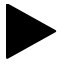
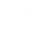
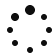
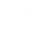
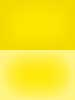
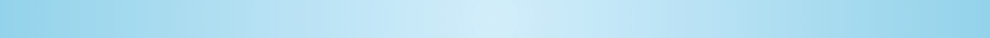

In [23]:
URL = "https://economics.ucla.edu/faculty/ladder"
soup = lovely_soup(URL)
text = str(soup)
print(soup.prettify())

In [24]:
matches = re.findall("https://economics.ucla.edu/person/[\w-]+/", text)

In [39]:
matches = [match for match in matches]
matches = list(set(matches))
matches

['https://economics.ucla.edu/person/jinyong-hahn/',
 'https://economics.ucla.edu/person/saki-bigio/',
 'https://economics.ucla.edu/person/rosa-liliana-matzkin/',
 'https://economics.ucla.edu/person/moritz-meyer-ter-vehn/',
 'https://economics.ucla.edu/person/denis-chetverikov/',
 'https://economics.ucla.edu/person/oleg-itskhoki/',
 'https://economics.ucla.edu/person/dora-costa/',
 'https://economics.ucla.edu/person/ichiro-obara/',
 'https://economics.ucla.edu/person/yotam-shem-tov/',
 'https://economics.ucla.edu/person/lee-e-ohanian/',
 'https://economics.ucla.edu/person/juliana-londono-velez/',
 'https://economics.ucla.edu/person/tomasz-sadzik/',
 'https://economics.ucla.edu/person/bernardo-s-silveira/',
 'https://economics.ucla.edu/person/hugo-hopenhayn/',
 'https://economics.ucla.edu/person/alexander-bloedel/',
 'https://economics.ucla.edu/person/martha-bailey/',
 'https://economics.ucla.edu/person/martin-b-hackmann/',
 'https://economics.ucla.edu/person/david-baqaee/',
 'https://ec

### Q3.B.) Webcrawl the links from A and use RegEx to get all the emails and phone numbers of ladder faculty profiles

<!DOCTYPE html>
<html class="html_stretched responsive av-preloader-disabled av-default-lightbox html_header_top html_logo_left html_bottom_nav_header html_menu_left html_large html_header_sticky_disabled html_header_shrinking_disabled html_header_topbar_active html_mobile_menu_tablet html_header_searchicon html_content_align_center html_header_unstick_top html_header_stretch_disabled html_minimal_header html_av-submenu-hidden html_av-submenu-display-click html_av-overlay-side html_av-overlay-side-classic html_av-submenu-clone html_entry_id_18808 av-cookies-no-cookie-consent" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="user-scalable = yes" name="viewport"/>
  <meta content="index, follow" name="robots">
   <link href="https://economics.ucla.edu/wp-content/uploads/2016/09/favicon.ico" rel="icon" type="image/x-icon"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
   <title>
    Pierre-Olivier Weill | UCLA Economics
   </tit
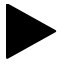
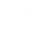
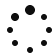
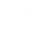
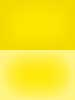
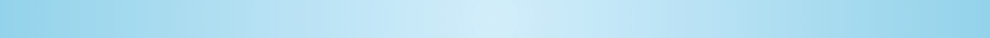

In [26]:
URL = "https://economics.ucla.edu/person/pierre-olivier-weill/"
soup = lovely_soup(URL)
text = str(soup)
print(soup.prettify())

In [63]:
phoneNumber = []

pattern = re.compile(r'\(?\s?\d{3}\s?\)?\-?\s?\d{3}-\d{4}')

for url in matches:
    soup = lovely_soup(url)
    text = str(soup)

    phone_numbers = pattern.findall(text)

    phoneNumber.extend(phone_numbers)
phoneNumber = list(set(phoneNumber))
phoneNumber

['(310) 794-1686',
 '(310) 825-5304',
 '(310) 825-6682',
 '(310) 825-7371',
 '(310) 825-9397',
 '(310) 825-0979',
 '(310) 825-8018',
 '(310) 794-5342',
 '(310) 794-7241',
 '(310) 825-5665',
 '(310) 825-0849',
 '(310) 825-2523',
 '(310) 206-8896',
 '(310) 825-4521',
 ' 310-869-0742',
 '(310) 825-4249',
 '(310) 206-9463',
 '(310) 825-7380',
 '(310) 206-2833',
 '(310) 206-6732',
 '(310) 825-3847',
 '(310) 206-6031',
 '(310) 794-7098',
 '(310) 794-6495',
 '(310) 794-5427',
 '(310) 825-1011',
 '(310) 825-3925']

In [73]:
emails = []
for url in matches:
    soup = lovely_soup(url)
    text = str(soup)
    email = re.findall(r'mailto:(?!webmaster\b)([\w.+%-]+@[\w.-]+\.[A-Za-z]+)', text)
    
    emails.extend(email)

emails

['hahn@econ.ucla.edu',
 'econchair@econ.ucla.edu',
 'chair@econ.ucla.edu',
 'sbigio@econ.ucla.edu',
 'matzkin@econ.ucla.edu',
 'mtv@econ.ucla.edu',
 'chetverikov@econ.ucla.edu',
 'itskhoki@econ.ucla.edu',
 'costa@econ.ucla.edu',
 'iobara@econ.ucla.edu',
 'shemtov@econ.ucla.edu',
 'ohanian@econ.ucla.edu',
 'j.londonovelez@econ.ucla.edu',
 'tsadzik@econ.ucla.edu',
 'silveira@econ.ucla.edu',
 'hopen@econ.ucla.edu',
 'abloedel@econ.ucla.edu',
 'marthabailey@ucla.edu',
 'hackmann@econ.ucla.edu',
 'baqaee@econ.ucla.edu',
 'nbau@g.ucla.edu',
 'mmazzocc@econ.ucla.edu',
 'johnasker@econ.ucla.edu',
 'haanwinckel@econ.ucla.edu',
 'fgoncalves@econ.ucla.edu',
 'andy@atkeson.net',
 'ghansen@econ.ucla.edu',
 'tornell@econ.ucla.edu',
 'andres@econ.ucla.edu',
 'poweill@econ.ucla.edu',
 'zhipeng.liao@econ.ucla.edu',
 'jvogel@econ.ucla.edu',
 'ssheng@econ.ucla.edu',
 'fgeerolf@econ.ucla.edu',
 'mgiorcelli@econ.ucla.edu',
 'pfajgelbaum@econ.ucla.edu',
 'sboard@econ.ucla.edu',
 'jay@econ.ucla.edu',
 'zame@

# Q4.) Selenium

### Q4.A.) Pick a website that has useful data to a business or economic question. Put your website you plan to scrape here : https://docs.google.com/spreadsheets/d/1yZTCktXhj7vT40HsITRQI_9FFZ-QIovSv4UZP9w67iI/edit?usp=sharing
### You must have use website that no other group has. First come first serve 

In [125]:
URL = 'https://www.swimcloud.com/times/?dont_group=false&event=150&gender=M&page=1&region=countryorganisation_usacollege&season_id=26'

In [126]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
PATH = "/Users/haydenjohnson00/Desktop/Drivers/chromedriver_mac_arm64/chromedriver"


In [127]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import time

### Q4.B.) Use Selenium to scrape valuable information from your website and store in a dataframe.

In [148]:
def collegeSwimming(event):
    import time
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(PATH, options = options)
    driver.get("https://www.swimcloud.com/times/?dont_group=false&event=150&gender=M&page=1&region=countryorganisation_usacollege&season_id=26")
    #Navigate dropdown menu
    dropdown = driver.find_element(By.ID, 'select_1')
    select = Select(dropdown)
    select.select_by_visible_text(event)
    time.sleep(3)
    #Swimmer Name
    swimmer_names = []
    nameLinks = driver.find_elements(By.CSS_SELECTOR, 'a[href^="/swimmer/"]')
    for link in nameLinks:
        name = link.text
        swimmer_names.append(name)
    #Team
    team_titles = []
    teamLinks = driver.find_elements(By.CSS_SELECTOR, 'a[href^="/team/"]')
    for link in teamLinks:
        title = link.get_attribute('title')
        team_titles.append(title)
    team_titles = list(filter(None, team_titles))
    #Time
    times = []
    timeLinks = driver.find_elements(By.CSS_SELECTOR, 'a[href^="/results/"]')
    for link in timeLinks:
        time = link.text
        times.append(time)

        cleanTimes = []

    for element in times:
        match = re.search(r'^\d*:?\d+\.\d+$', element)
        if match:
            cleanTimes.append(match.group(0))
    #Make Dataframe
    df = {'Swimmer': swimmer_names, 'Team': team_titles, 'Time': cleanTimes}
    df = pd.DataFrame(df)
    
    driver.quit()
    
    return df

In [150]:
collegeSwimming('1000 Free')



/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_19026/286428583.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options = options)


,Swimmer,Team,Time
0,David Johnston,University of Texas,8:41.61
1,Will Gallant,North Carolina State University,8:44.48
2,Ross Dant,North Carolina State University,8:46.90
3,Charlie Clark,Ohio State University,8:48.61
4,Levi Sandidge,University of Kentucky,8:48.68
5,Zalán Sarkany,Arizona State University,8:49.31
6,Luke Hobson,University of Texas,8:50.10
7,Alec Enyeart,University of Texas,8:50.62
8,Tyler Watson,University of Florida,8:50.78
9,Mason Mathias,Auburn University,8:51.45


### Q4.C.) Write a short paragraph about the businesses or research that would use the data you scraped. Descrivbe it's value and what it can be used for.

The function I wrote can go through an event and get the top 50 times for college swimming. The NCAA typically takes between 19-25 guys for an event, so a swimmer can see how close they would be to making NCAAs if they are on the bubble. The function could be expanded to go through all the years available to see how much faster swimmers have gotten, and to try to understand why swimmers may be getting faster, whether it is training or the swim suits available at the time.